This is a practice exercise from the [source](https://www.youtube.com/embed/Q73ADVZCqSU?controls=1&showinfo=0&rel=0&autoplay=1)

In [60]:
%pylab inline
import pandas # data manipulation
import seaborn # plot data

Populating the interactive namespace from numpy and matplotlib


In [61]:
# load csv file into memory
data = pandas.read_csv("uber-raw-data-apr14.csv")
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [62]:
type(data['Date/Time'][0])

str

In [63]:
# convert date string to date-time format and update the table
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


In [64]:
type(data['Date/Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [65]:
# create new columns for day, weekday, and hour
def get_dom(dt):
    return dt.day

def get_weekday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['day_of_month'] = data['Date/Time'].map(get_dom)
data['weekday'] = data['Date/Time'].map(get_weekday)
data['hour'] = data['Date/Time'].map(get_hour)
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analyze the frequency of sales in different days of a month

Text(0.5, 1.0, 'Rides Frequency by Date of the Month - Uber - April 2014')

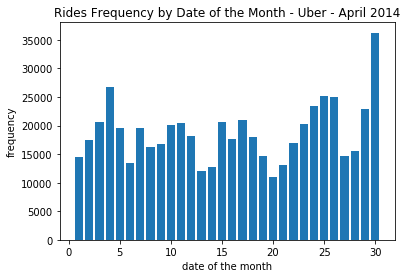

In [82]:
# by default histogram has 10 bins 
hist(data.day_of_month, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('date of the month')
ylabel('frequency')
title('Rides Frequency by Date of the Month - Uber - April 2014')

<BarContainer object of 30 artists>

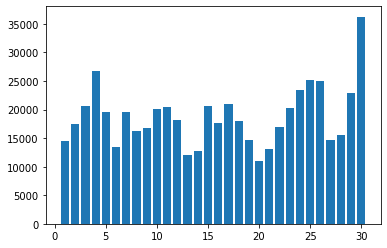

In [71]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('day_of_month').apply(count_rows)
bar(range(1, 31), by_date)

''

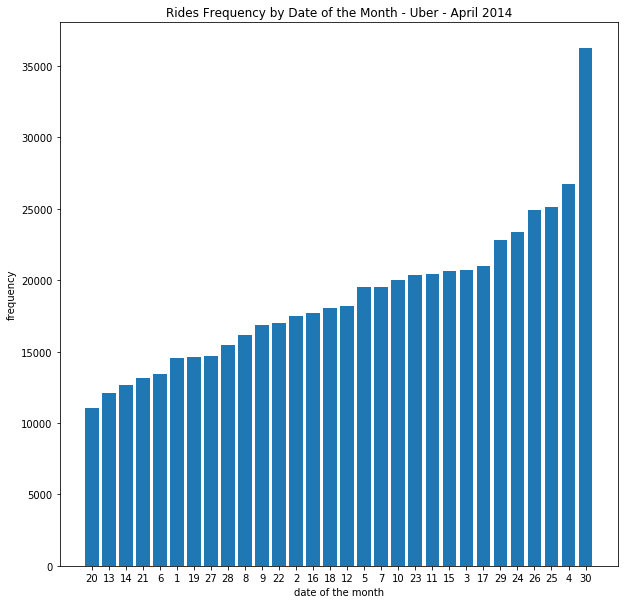

In [157]:
by_date_sorted = by_date.sort_values()
figure(figsize=(10,10))
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Rides Frequency by Date of the Month - Uber - April 2014')
;

## Analyze by hour

''

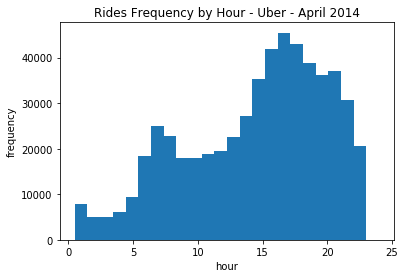

In [99]:
hist(data.hour, bins=24, range=(.5, 24))
xlabel('hour')
ylabel('frequency')
title('Rides Frequency by Hour - Uber - April 2014')
;

## Analyze by weekday

''

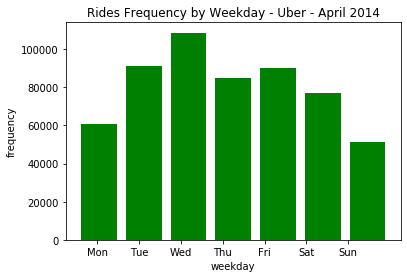

In [100]:
hist(data.weekday, bins=7, range=(-.5, 7), rwidth=.8, color='green')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('weekday')
ylabel('frequency')
title('Rides Frequency by Weekday - Uber - April 2014')
;

## Cross Analysis (Hour, Weekday)

In [106]:
by_hour_and_weekday = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
by_hour_and_weekday

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


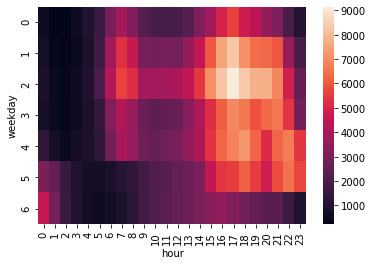

In [108]:
seaborn.heatmap(by_hour_and_weekday)

### By lat and lon

''

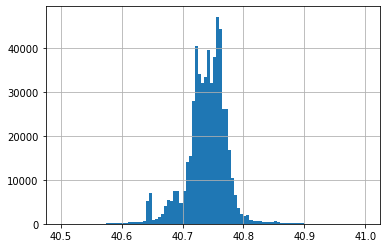

In [123]:
hist(data['Lat'], bins=100, range = (40.5, 41))
grid()
;

''

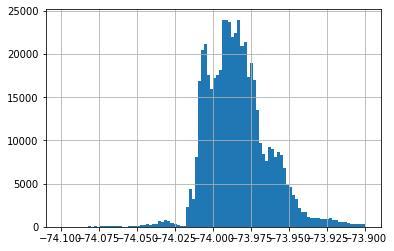

In [124]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9))
grid()
;

''

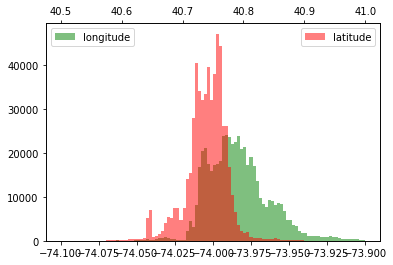

In [128]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label='longitude')
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label='latitude')
legend(loc='best')
;

(0, 100)

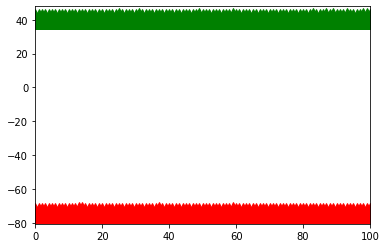

In [138]:
# default symbol is line
plot(data['Lat'], '^', ms=20, color='g', label='lat')
plot(data['Lon'], '^', ms=20, color='r', label='lon')
xlim(0,100)

(40.7, 41)

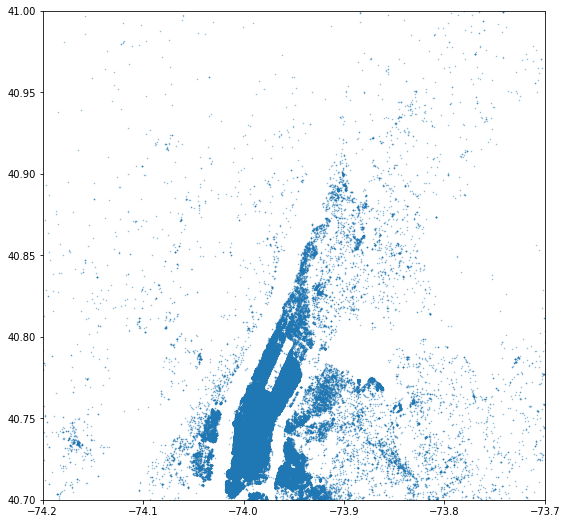

In [154]:
# x-axis = lon, y-axis = lat
figure(figsize=(9,9))
plot(data['Lon'], data['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)